In [6]:
import pandas as pd
import numpy as np

import importlib
import sys
#sys.path.append('D:\\OneDrive - Uniwersytet Jagielloński\\Naukowe\\DigitalHum\\Piasecki') # ścieżka do folderu, w którym znajduje się podfolder 'cl_explainable_stylo'
from cl_explainable_stylo import base

In [7]:
import pandas as pd
import numpy as np

data = pd.read_csv('dane_wiki_final.csv')

styles = ['wiki_text','wiki_response_gpt3', 'wiki_response_gpt4', 'wiki_response_orca', 'wiki_response_falcon','wiki_response_llama','wiki_response_llama3']
terms = data['term'].to_numpy()
model_array = np.empty(0)
terms_array = np.empty(0)
filenames_array = np.empty(0)
texts_array = np.empty(0)
for s in styles:
    model_name = str.split(s,'_')[-1]
    if model_name == 'text':
        model_name = 'wiki'
    elif model_name == 'llama':
        model_name = 'llama2'
    model_array = np.append(model_array,np.repeat(model_name,len(terms)))
    filenames_array = np.append(filenames_array,np.repeat('',len(terms)))
    texts_array = np.append(texts_array,data[s].values)
    terms_array = np.append(terms_array,terms)

metadata = {"experiment_name":"watermarking_stylometrix","labels": ["filename", "class", "term"],
    'files':{"filename":list(filenames_array), "class":list(model_array),"term":list(terms_array)},
            "preproc_scheme": {'model':'en_core_web_lg'},
            "feature_scheme": None,
            "subsample_scheme": {'sample_type': 'none', 'sample_length': 800},
            "classifier_params": None,
            "cv_scheme": None,
           }

import json
with open("exp_stylometrix.json", 'w', encoding='utf-8') as file:
    file.write(json.dumps(metadata))

In [9]:
import pandas as pd
import numpy as np

styles = ['wiki_text','wiki_gpt3', 'wiki_gpt4', 'wiki_orca', 'wiki_falcon','wiki_llama2','wiki_llama3']

expanded_df = pd.DataFrame()
for s in styles:
    # s = styles[0]
    data = pd.read_csv('stylo_'+s+'.csv')
    expanded_df = pd.concat([expanded_df, data], ignore_index=True)

texts_array = expanded_df.text.to_numpy()
expanded_df.drop(columns = ['text','Unnamed: 0'],inplace=True)

In [10]:
importlib.reload(base)
exp = base.explain_style('exp_stylometrix.json',manual = True)
# exp.texts_load()

Initialisation metadata loaded from exp_stylometrix.json.
Available text labels ['filename', 'class', 'term'].
Predefined text classes ['wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 'wiki', 

In [11]:
exp.docs_load('docs.spacy')

Provided model name for Spacy: 'en_core_web_lg'.
Labels ['filename', 'class', 'term'] will be now accessible in documents via 'document._.label'.
Loaded 17073 documents.


In [12]:
sdoc = exp.docs[17000]

In [13]:
exp.subsample_scheme = {'sample_type': 'none', 'sample_length': 0}
exp.texts_subsample()

No text subsampling with current setting: 'sample_type = 'none'.


In [14]:
from cl_explainable_stylo import text_classify
importlib.reload(text_classify)
exp.cv_scheme = {'n_repeats':1,'cv_method':'GroupKFold','n_splits': 10,'val_fraction':0., 
                 'scoring': {'mcc':text_classify.dic_to_score['mcc'],
                             'topk':text_classify.dic_to_score['topk']}}

In [15]:
# expanded_df.to_csv('../../Przystalski/watermark-llm/explain_watermarking_stylometrix/subsamples_none_800/features.csv',index=False)
exp.features_load('features.csv')

Features loaded from 'features.csv' to '.feature_dataframe' attribute.


In [16]:
# exp.classifier_scheme['objective'] = 'multiclass'
# exp.classifier_scheme['metric'] = ['multiclass','multi_error']
# exp.classifier_scheme['num_class'] = 7
exp.load_params_classifier('multiclass_classifier_scheme.json')
exp.classifier_scheme

'Classifier parameters' loaded from 'multiclass_classifier_scheme.json'.


{'objective': 'multiclass',
 'learning_rate': 0.5,
 'metric': ['multiclass', 'multi_error'],
 'nthread': 12,
 'boosting': 'dart',
 'num_leaves': 5,
 'num_iterations': 100,
 'max_depth': 5,
 'bagging_freq': 3,
 'bagging_fraction': 0.8,
 'verbose': -1,
 'num_class': 7}

In [17]:
exp.classifier_scheme

{'objective': 'multiclass',
 'learning_rate': 0.5,
 'metric': ['multiclass', 'multi_error'],
 'nthread': 12,
 'boosting': 'dart',
 'num_leaves': 5,
 'num_iterations': 100,
 'max_depth': 5,
 'bagging_freq': 3,
 'bagging_fraction': 0.8,
 'verbose': -1,
 'num_class': 7}

In [18]:
exp.classify(group_category='term',save_to_file=True)

Proceeding with 7 classes.
Proceeding with 2439 classes.
Proceeding with GroupKFold cross-validation.


  0%|          | 0/1 [00:00<?, ?it/s]

'val_fraction' setting results in 0.0 validation samples. No nested validation will be performed.
Train:15365, Val:0, Test:1708


/Users/kprzystalski/miniforge3/lib/python3.9/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


'val_fraction' setting results in 0.0 validation samples. No nested validation will be performed.
Train:15365, Val:0, Test:1708


/Users/kprzystalski/miniforge3/lib/python3.9/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


'val_fraction' setting results in 0.0 validation samples. No nested validation will be performed.
Train:15365, Val:0, Test:1708


/Users/kprzystalski/miniforge3/lib/python3.9/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


'val_fraction' setting results in 0.0 validation samples. No nested validation will be performed.
Train:15365, Val:0, Test:1708


/Users/kprzystalski/miniforge3/lib/python3.9/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


'val_fraction' setting results in 0.0 validation samples. No nested validation will be performed.
Train:15365, Val:0, Test:1708


/Users/kprzystalski/miniforge3/lib/python3.9/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


'val_fraction' setting results in 0.0 validation samples. No nested validation will be performed.
Train:15365, Val:0, Test:1708


/Users/kprzystalski/miniforge3/lib/python3.9/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


'val_fraction' setting results in 0.0 validation samples. No nested validation will be performed.
Train:15365, Val:0, Test:1708


/Users/kprzystalski/miniforge3/lib/python3.9/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


'val_fraction' setting results in 0.0 validation samples. No nested validation will be performed.
Train:15365, Val:0, Test:1708


/Users/kprzystalski/miniforge3/lib/python3.9/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


'val_fraction' setting results in 0.0 validation samples. No nested validation will be performed.
Train:15365, Val:0, Test:1708


/Users/kprzystalski/miniforge3/lib/python3.9/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


'val_fraction' setting results in 0.0 validation samples. No nested validation will be performed.
Train:15372, Val:0, Test:1701


/Users/kprzystalski/miniforge3/lib/python3.9/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


  0%|          | 0/10 [00:00<?, ?it/s]

Matthews corr. [-1-1, higher better]: 	0.72 	 Baseline value:  0.00
Correct prediction in top k results [0-1, higher better]: 		0.76 	 Baseline value:  0.14
Default folder 'explain_watermarking_stylometrix/subsamples_none_0' created.
Scores saved as explain_watermarking_stylometrix/subsamples_none_0/scores_class-class_group-term.pkl.
Classifiers saved as explain_watermarking_stylometrix/subsamples_none_0/classifiers_class-class_group-term.pkl.
Classifier parameters saved as 'explain_watermarking_stylometrix/subsamples_none_0/config_classifier_scheme.json'. It can be reloaded with '.load_params_classifier(filename)'.
Cross-validation parameters saved as 'explain_watermarking_stylometrix/subsamples_none_0/config_cv_scheme.pkl'. It can be reloaded with '.load_params_cv(filename)'.


In [19]:
# w folderze 'subsamples_none_{sample_length}' powinny się zapisać pliki z wynikami
# Uwaga: jeśli powtarzasz eksperymenty, to pliki się nie nadpisują, tylko zwiększają numerek

# Tutaj można je pojedynczo załadować
exp.scores_load(postfix='_class-class_group-term')
exp.classifiers_load(postfix='_class-class_group-term')
exp.classes_used

Loaded scores from explain_watermarking_stylometrix/subsamples_none_0/scores_class-class_group-term.pkl. Printing scores:
Matthews corr. [-1-1, higher better]: 	0.72 	 Baseline value:  0.00
Correct prediction in top k results [0-1, higher better]: 		0.76 	 Baseline value:  0.14
Loaded cross-validated classifiers from explain_watermarking_stylometrix/subsamples_none_0/classifiers_class-class_group-term.pkl.
Proceeding with 7 classes.


{0: ['llama3'],
 1: ['gpt3'],
 2: ['orca'],
 3: ['falcon'],
 4: ['llama2'],
 5: ['wiki'],
 6: ['gpt4']}

In [20]:
# min / max / średnia
cv_scores = [m['mcc'] for m in exp.scores.scores_all]
print([np.min(cv_scores), np.max(cv_scores), np.mean(cv_scores)])
cv_scores = [m['topk'] for m in exp.scores.scores_all]
print([np.min(cv_scores), np.max(cv_scores), np.mean(cv_scores)])

[0.6928560190607812, 0.7281965364871362, 0.7158640635563558]
[0.7365339578454333, 0.7669789227166276, 0.7563347500505969]


In [21]:
# Jakoś mi się zmienia tutaj kolejność klas
# Trzeba potem w zmiennej 'label_reord' ręcznie ustawić taką, jak chcesz to prezentacji wyników
exp.classes_used

{0: ['llama3'],
 1: ['gpt3'],
 2: ['orca'],
 3: ['falcon'],
 4: ['llama2'],
 5: ['wiki'],
 6: ['gpt4']}

In [22]:
# Rysowanie macierzy pomyłek

from sklearn.metrics import confusion_matrix
import numpy as np
df = exp.scores.df_preds
label_reord = [2,6,5,4,1,0,3]
print([exp.classes_used[i][0] for i in label_reord])
arr = confusion_matrix(df.y_true.apply(lambda x: x[0]),
                 df.y_pred.apply(lambda x: x[0]),
                labels = label_reord,normalize = 'true')

# Function to round each element to two significant digits
def format_to_significant_digits(arr, significant_digits):
    formatted_array = []
    for row in arr:
        formatted_row = []
        for num in row:
            if num != 0:
                # Determine the power of 10 of the number
                power = np.floor(np.log10(abs(num)))
                # Calculate the number of decimal places to retain
                decimals = significant_digits - int(power) - 1
                # Format the number to the calculated decimal places
                formatted_row.append(f"{num:.{decimals}f}")
            else:
                formatted_row.append(f"{num:.{significant_digits - 1}f}")
        formatted_array.append(formatted_row)
    return np.array(formatted_array)

# Apply the function to the array
formatted_array = format_to_significant_digits(arr, 2)

# Display the result
for row in formatted_array:
    print(" ".join(row))


['orca', 'gpt4', 'wiki', 'llama2', 'gpt3', 'llama3', 'falcon']
0.68 0.0025 0.016 0.21 0.0053 0.0025 0.084
0.0041 0.72 0.043 0.0066 0.11 0.11 0.0062
0.0078 0.043 0.89 0.0082 0.011 0.026 0.0090
0.19 0.0062 0.0090 0.72 0.0029 0.0041 0.074
0.0098 0.10 0.018 0.0037 0.77 0.094 0.0074
0.0012 0.11 0.048 0.0049 0.091 0.74 0.011
0.091 0.0078 0.014 0.082 0.010 0.013 0.78


In [23]:
import shap
output_names=[i[0] for i in exp.classes_used.values() if len(i)]
record = exp.classifiers[0]
model = record['trained_model']
test_index = record['test_index']
x_test =exp.feature_dataframe.iloc[test_index,:]
# shap_values.output_names = output_names

In [25]:
model.save_model('lbm.model')

In [31]:
import lightgbm as lgb

a = lgb.basic.Booster(model_file='lbm.model')

In [32]:
a.predict("sample")

[LightGBM] [Fatal] Data file sample doesn't exist.


LightGBMError: Data file sample doesn't exist.

In [15]:
explainer = shap.TreeExplainer(model,x_test)
shap_values = explainer(x_test)

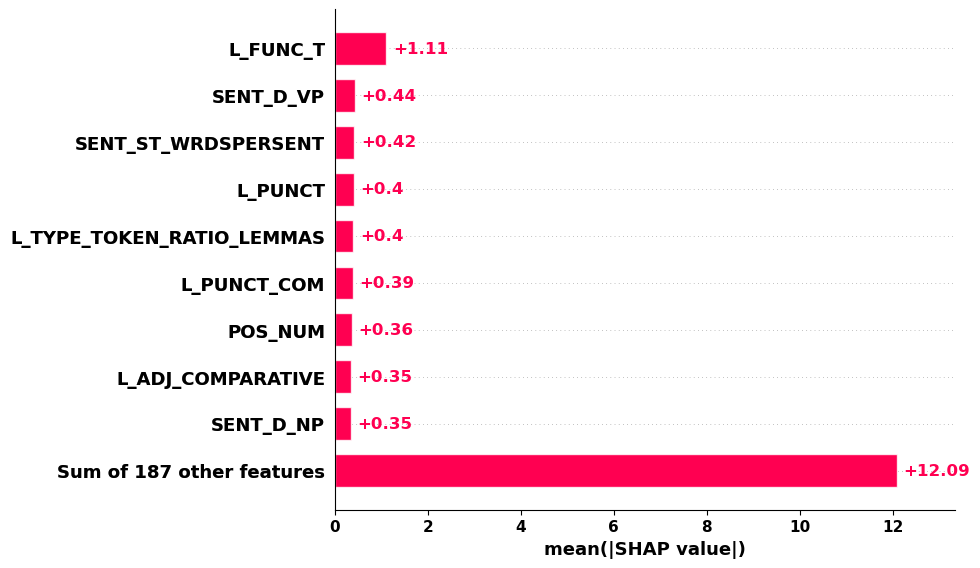

In [16]:
# W wieloklasowej klasyfikacji nie ma jednego kierunku +/- (jedna/druga klasa)
# więc pokazuję tylko wart. bezwględną
shap.plots.bar(shap_values)

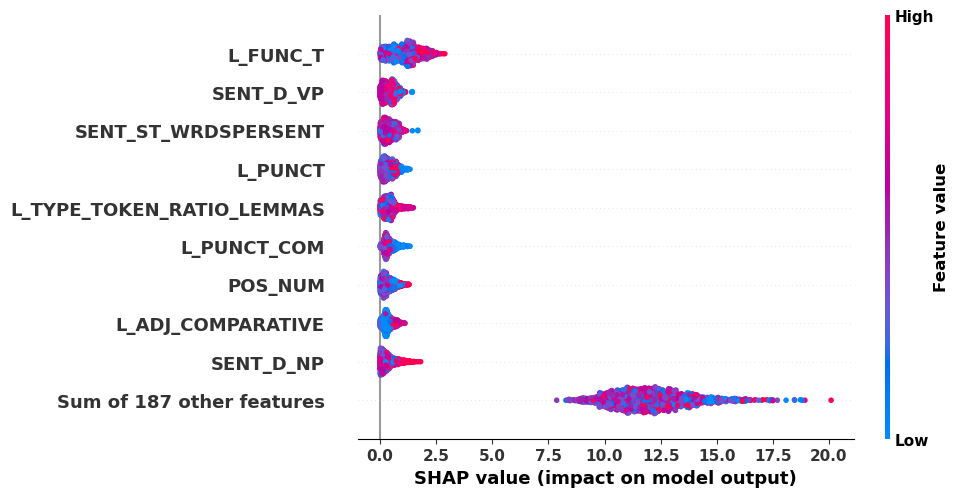

In [17]:
shap.plots.beeswarm(shap_values.abs)

In [ ]:
exp.plot_summary()

In [ ]:
exp.plot_group_summary('term')

In [ ]:
exp.plot_text(44)

In [ ]:
exp.plot_group_texts('class',group=exp.metadata['files']['term'][3])

In [ ]:
# exps.compute_group(groups)

from matplotlib import pyplot as plt
import shap
%matplotlib inline
shap.summary_plot(exp.explanations.shap_group, exp.feature_dataframe.groupby(by=groups).mean(), show = False, max_display = 12)
plt.title('Each point = average '+group_by)
plt.show()